TFVector Recommender:

This chunk generates a matrix of TFIDF vectors of the transcripts, then uses cosine similiarity to generate a column that is added onto the metadata dataframe listing the top 3 most similar other TED talks.

In [7]:
import os

import pandas as pd

import numpy as np
[InternetShortcut]
URL=http://localhost:8888/notebooks/data/136%20-%20Ted%20Talk%20Analysis.ipynb#

from sklearn.feature_extraction import text

from sklearn.metrics.pairwise import cosine_similarity


os.chdir('C:/Users/dad/Desktop/136/data/kaggle-data/')


transcripts = pd.read_csv('transcripts.csv')

transcripts['title']=transcripts['url'].map(lambda x:x.split("/")[-1])



def analyzeScripts():

    scripts = getScripts()

    vectorMatrix = generateTFIDMatrix(scripts)

    unigramMatrix = generateUnigramMatrix(vectorMatrix)

    return vectorMatrix, unigramMatrix



def getScripts():

    return transcripts['transcript'].tolist()



def generateTFIDMatrix(scripts):

    tfidfGenerator = text.TfidfVectorizer(input= scripts, stop_words= "english")

    matrix = tfidfGenerator.fit_transform(scripts)

    return matrix



def generateUnigram(tfidMatrix):

    return cosine_similarity(tfidMatrix)



def getSimilarArticles(articleText):

    allScripts = getScripts()

    allScripts.append(articleText)

    tfdiMatrix = generateTFIDMatrix(allScripts)

    unigram = generateUnigram(tfdiMatrix)

    return ",".join(transcripts['title'].loc[unigram[-1].argsort()[-5:-1]])





if __name__ == "__main__":

    allScripts = getScripts()

    testText = allScripts.pop(5)

    transcripts.drop(5, inplace=True)

    #tfidfGenerator = text.TfidfVectorizer(input= allScripts, stop_words= "english")

    #matrix = tfidfGenerator.fit_transform(allScripts)

    #print(matrix.shape)



    #print(generateTFIDMatrix(allScripts).shape)

    #print(generateUnigram(matrix).shape)

    print(getSimilarArticles(testText))

    

malcolm_london_high_school_training_ground
,jennifer_8_lee_looks_for_general_tso
,mandy_len_catron_falling_in_love_is_the_easy_part
,jaap_de_roode_how_butterflies_self_medicate



Clean Text:

Punctuation and symbols need to be removed from the transcripts. This chunk has a list of symbols and "junk" to look out for and replaces them with new lines.

In [8]:
import pandas as pd



def main():

    print('Cleaning your data...')

    filepath = 'C:/Users/dad/Desktop/136/data/kaggle-data/'
    
    filename = 'transcripts.csv'

    target_filename = 'clean_transcripts.csv'

    

    df = pd.read_csv(filepath + filename)

    

    # Remove non-ascii first

    df.transcript.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

    patts = [".", "?", "!", "\'", "(Laughter)", "(Applause)", "(", ")", "\"", "\n ", "-", ";", ":"]

    repl = ["\n", "", "Laughter\n", "Applause\n"]



    # Replace everything

    df['clean_transcripts'] = df.transcript.str.replace(patts[0], repl[0])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[1], repl[0])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[2], repl[0])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[3], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[4], repl[2])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[5], repl[3])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[6], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[7], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[8], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[9], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[10], repl[1])

    df['clean_transcripts'] = df.clean_transcripts.str.replace(patts[11], repl[1])

    

    # Make everything lower case

    df['clean_transcripts'] = df['clean_transcripts'].str.lower()

    

    df.to_csv(filepath + target_filename)

    print('Your new .csv has been written to {}'.format(filepath 

        + target_filename))



if __name__ == "__main__":

    main()

Cleaning your data...
Your new .csv has been written to C:/Users/dad/Desktop/136/data/kaggle-data/clean_transcripts.csv


In [11]:
import pandas as pd
import numpy as np
import re
import nltk
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
import xgboost as xgb
from sklearn.cluster import KMeans
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
nltk.download('stopwords')
import os
import random

from sklearn.feature_extraction import text
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
filepath = 'C:/Users/dad/Desktop/136/data/kaggle-data/'
filename = 'merged_data.csv'

#Load data into new dataframe
Data = pd.read_csv(filepath + filename) 

#get rid of the junk column
dfA = Data.drop(['Unnamed: 0'], axis=1)

#Load data into new dataframe
evData = pd.read_csv(filepath + filename) 

#get rid of the junk column
dfB = evData.drop(['Unnamed: 0'], axis=1)


In [14]:
import os
import textblob

class Logger():

    def __init__(self, datasetName, header= ".md"):
        self.datasetName = datasetName
        self.headerInfo = "Talk Title,Polarity,Subjectivity\n"
        self.header = header

    def createDataset(self):
        files = self.getAllDataFiles()
        allScores = self.collectScores(files)
        self.logToDataset(allScores)
        

    def getAllDataFiles(self):
        filesInCWD = [file for file in os.listdir('.') if os.path.isfile(file)]
        if self.datasetName not in filesInCWD:
            self.initDataCSV()

        dataFiles = [file for file in filesInCWD if self.isDataFile(file)]
        return dataFiles
                

    def initDataCSV(self):
        fileName = self.getFileName()

        with open(fileName, 'w+') as file:
            file.write(self.headerInfo)

    def getFileName(self):
        fileName = self.datasetName
        if '.csv' not in self.datasetName:
            fileName += '.csv'
        return fileName


    def isDataFile(self, fileName):
        if fileName[-len(self.header):] == self.header:
            return True
        else:
            return False
    
    def collectScores(self, files):
        scores = [self.collectScore(file) for file in files]
        return scores

    def collectScore(self, fileName):
        with open(fileName, 'r') as file:
            scores = textblob.TextBlob(file.read())
            polarity = str(round(scores.sentiment.polarity, 3))
            subjectivity = str(round(scores.sentiment.subjectivity, 3))
        return [fileName[:-len(self.header)], polarity, subjectivity]

    def logToDataset(self, scores):
        with open(self.getFileName(), 'a') as file:
            for fileScore in scores:
                file.write(','.join(fileScore) + "\n")

    
if __name__ == "__main__":
    outputName = "testDataSet.csv"
    dataLogger = Logger(outputName)
    dataLogger.createDataset()

In [15]:
import gender_guesser.detector as gender

genDetector = gender.Detector()
speaker_names = dfA.main_speaker.tolist()

print ('Gathering gender data and adding it to data set...')

# Get gender data
first_names = []
genders = []
for name in speaker_names:
    first_last = name.split(' ')
    first = first_last[0]
    first_names.append(first)
    genders.append(genDetector.get_gender(first))

for i, gender in enumerate(genders):
    if gender == 'mostly_male':
        genders[i] = 'male'
    if gender == 'mostly_female':
        genders[i] = 'female'
    if gender == 'andy':
        genders[i] = 'unknown'

print("Current number of data points is {}".format(dfA.shape[0]))
print("Dropping unknown genders from data set...")
dfA['gender'] = genders
dfA = dfA[dfA.gender != 'unknown']
print("After dropping, there are {} data points".format(dfA.shape[0]))

# Convert to 0 and 1
#pd.Series(np.where(dfA.gender.values == 'male', 1, 0), dfA.index)
dfA.replace('male', 0, inplace=True)
dfA.replace('female', 1, inplace=True)
print("Labels converted to {}".format(type(dfA.gender.values)))


Gathering gender data and adding it to data set...
Current number of data points is 2550
Dropping unknown genders from data set...
After dropping, there are 2225 data points
Labels converted to <class 'numpy.ndarray'>


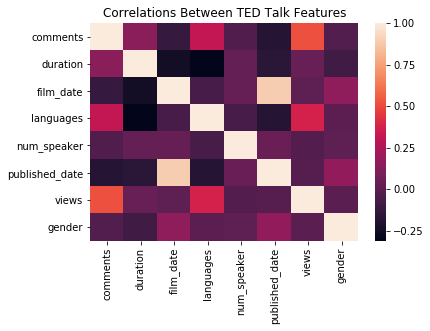

In [16]:
#taking a glance at pairwise relationships in the metadata

correlations = dfA.corr()
_ = sns.heatmap(correlations)
_ = plt.title('Correlations Between TED Talk Features')
plt.show()

In [17]:
#creating individual rating categories. These will show how many times this rating has been given to each Ted Talk.

rating_counts = {'Longwinded':[],'Courageous':[],'Obnoxious':[],'Fascinating':[],'OK':[],'Inspiring':[],'Beautiful':[],
                'Confusing':[],'Funny':[],'Persuasive':[],'Informative':[],'Ingenious':[],'Unconvincing':[],'Jaw-dropping':[]}

#itertuples iterates the steps through all rows
for row in dfB.itertuples():
    ratings = eval(row.ratings)
    done_ratings = set()
    
    for rating in ratings: 
        name = rating['name']
        done_ratings.add(name) # Add to the set of ratings we've seen this talk tagged as
        count = rating['count']
        rating_counts[name].append(count)
        
    for key in rating_counts.keys():
        if key not in done_ratings:
            rating_counts[key].append(0)  # The tag wasn't used for the talk by anyone, 0 is the count
    done_ratings.clear() 

# Add rating counts to dictionary and remove the old ratings category 
for key,value in rating_counts.items():
    dfB[key] = value
_ = dfB.drop(labels = ['ratings'],axis=1)
dfB.head()

,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,main_speaker,...,OK,Inspiring,Beautiful,Confusing,Funny,Persuasive,Informative,Ingenious,Unconvincing,Jaw-dropping
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morninghow are you\r\r\nlaughter\r\r\nits...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,...,1174,24924,4573,242,19645,10704,7346,6073,300,4439
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chrisand its truly a great ...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,...,203,413,58,62,544,268,443,56,258,116
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,...,146,230,60,27,964,230,395,183,104,54
3,If you're here today and I'm very happy that ...,https://www.ted.com/talks/majora_carter_s_tale...,if youre here today and im very happy that yo...,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,...,85,1070,291,32,59,460,380,105,36,230
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,...,248,2893,942,72,1390,2542,5433,3202,67,3736


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyError: 'subjectivity'

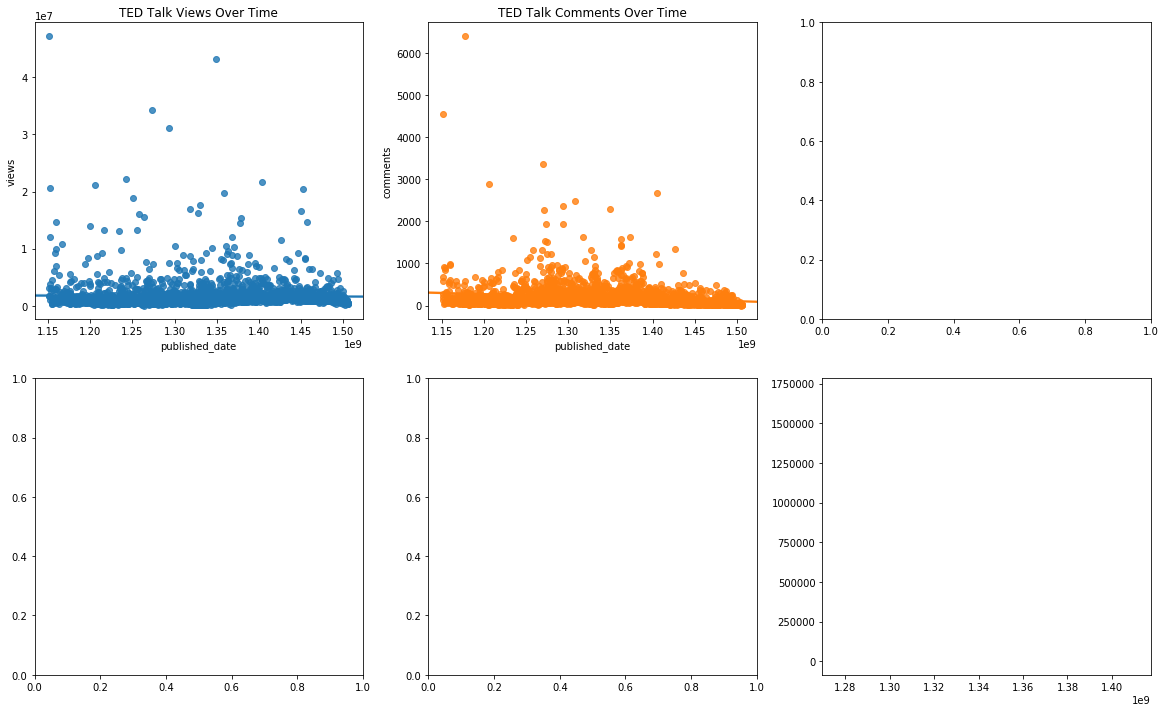

In [18]:
#visualizing some of the metadate across time for all talks
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Views
_ = sns.regplot(x='published_date',y='views',data=dfB,ax=axes[0,0])
_ = axes[0,0].set_title('TED Talk Views Over Time')

# Comments
_ = sns.regplot(x='published_date',y='comments',data=dfB,ax=axes[0,1])
_ = axes[0,1].set_title('TED Talk Comments Over Time')

# Subjectivity
_ = sns.regplot(x='published_date',y='subjectivity',data=dfB,ax=axes[0,2])
_ = axes[0,2].set_title('TED Talk Subjectivity Over Time')

# Duration 
_ = sns.regplot(x='published_date',y='duration',data=dfB,ax=axes[1,0])
_ = axes[1,0].set_title('TED Talk Duration Over Time')

# Polarity
_ = sns.regplot(x='published_date',y='polarity',data=dfB,ax=axes[1,1])
_ = axes[1,1].set_title('TED Talk Polarity Over Time')


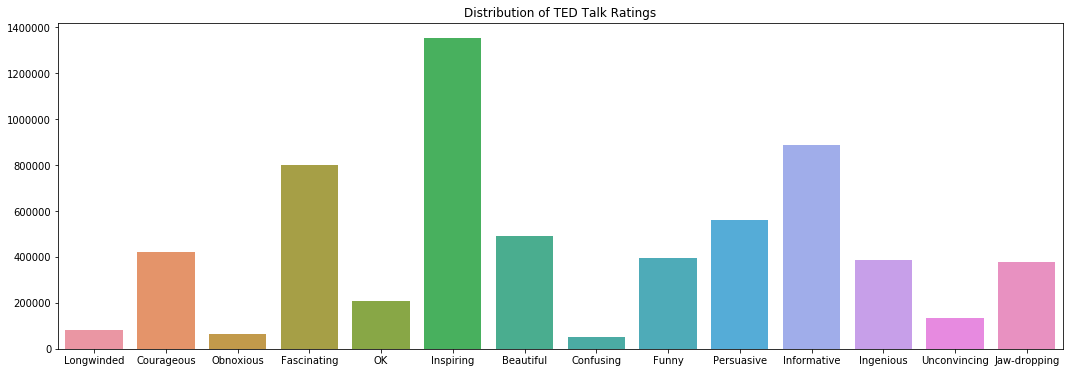

In [19]:
#Visualizing overall trends in how ratings are designated by viewers (includes both genders)

total_counts = []
for k,v in rating_counts.items():
    total_counts.append(np.sum(v))
    
_ = fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
_ = sns.barplot(x = list(rating_counts.keys()),y=total_counts,ax = axes)
_ = plt.title('Distribution of TED Talk Ratings')
plt.show()

In [20]:
#getting the meaningful words out of the transcripts
def getWords(df,removeStopWords):
    words = []
    for row in df.itertuples():
        words.extend(row.clean_transcripts.split())
    
    # Removing Stopwords ('the', 'it', 'is', 'and', etc)
    if removeStopWords:
        stopWords = set(stopwords.words('english'))
        print("Removing the stop words... ")
        
        filteredWords =[]
        for word in words: 
            if word not in stopWords:
                filteredWords.append(word)
                
        return filteredWords
    
    return words

In [21]:
def mostFrequentWords(df, numWordsDesired, descriptor='', removeStopWords=True, normalize=False):
    # This loops over all rows in the clean transcripts column and 
    # puts every word in every transcript into a list called words
    words = getWords(df,removeStopWords)
    
    descriptor2=''
    if removeStopWords:
        descriptor2 = '(excluding stop words like \'the\')'
    
    # Get counts for each word
    wordCounts = Counter(words)
    print(descriptor,'Number of unique words:',descriptor2,len(wordCounts))

    # Grab the most common words
    mostCommon = dict()
    for word, wordCount in wordCounts.most_common(numWordsDesired):
        if normalize:
            # Divide by total # of words to get percentage of words said
            mostCommon[word] = wordCount/float(len(words)) 
        else:
            mostCommon[word] = wordCount
    # Plot a histogram
    _ = plt.figure(figsize=(20,10))
    _ = sns.barplot(list(mostCommon.keys()), list(mostCommon.values()))
    title = ('The '+str(numWordsDesired)+' Most Common Words ' + descriptor2 +
             ' In All ' + descriptor +' TED Talk Transcripts')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    
    # Return list of most common words
    return mostCommon

In [22]:
#Showing the top 15 words across both genders
_ = mostFrequentWords(dfB,15)

AttributeError: 'float' object has no attribute 'split'

In [23]:
#introducing the gender guesser library, which will use the first names of speakers to determine gender
import gender_guesser.detector as gender

genDetector = gender.Detector()
speakerNames = dfB.main_speaker.tolist()

speakerFirstNames = []
genders = []
for name in speakerNames:
    firstLastName = name.split(' ')
    firstName = firstLastName[0]
    speakerFirstNames.append(firstName)
    genders.append(genDetector.get_gender(firstName))
dfB['gender'] = genders

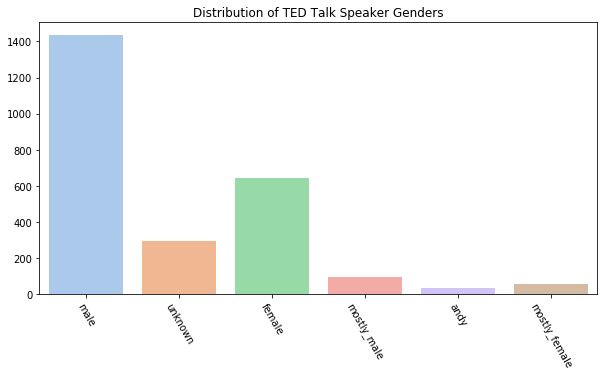

In [24]:
# Plot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()), palette='pastel')
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

In [25]:
#Merge male/mostly male, female/mostly female, and androgynous/unknown
for i,gender in enumerate(genders):
    if gender == 'mostly_male':
        genders[i] = 'male'
    if gender == 'mostly_female':
        genders[i] = 'female'
    if gender == 'andy':
        genders[i] = 'unknown' 

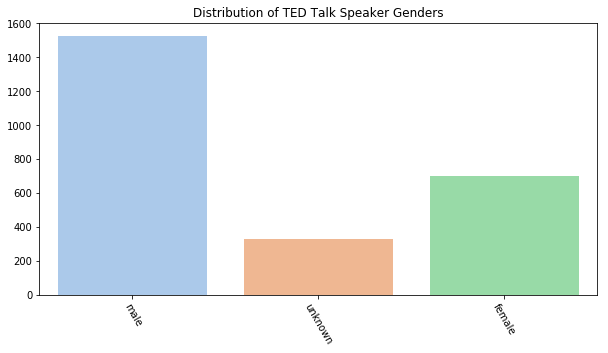

In [26]:
dfB['gender'] = genders
# Replot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()), palette='pastel')
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
#maeplt.show()

In [27]:
#make a new dataframe that omits unknown cases
dfB = dfB[dfB["gender"] != 'unknown']

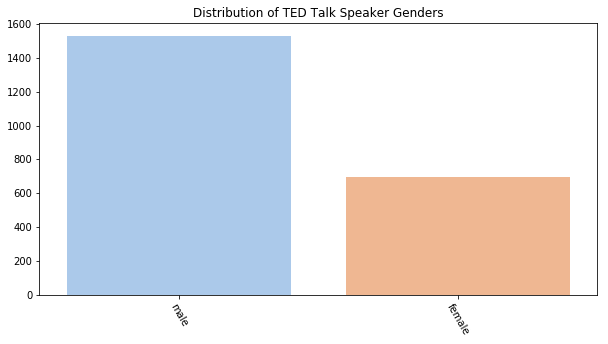

In [28]:
# Replot a histogram of binary genders
genderCounts = Counter(dfB['gender'])
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()), palette='pastel')
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

In [29]:
genderBinary = label_binarize(dfB.gender.values,classes=['female','male'])
dfB['gender'] = genderBinary

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
def getTFIDFvectors(dataframe):
    scripts = dataframe['transcript'].tolist()
    tfidfGenerator = text.TfidfVectorizer(input= scripts, stop_words= "english")
    matrix = tfidfGenerator.fit_transform(scripts)
    return matrix

In [32]:
def simpleGenderClf(dfB,numFolds = 5):
    y = dfB['gender'].values # What we're trying to predict
    X = dfB.drop(labels=['gender'],axis=1).select_dtypes(include=[np.number]).values # Features we are using
        
    #Let's do k fold cross validation to see how well this baseline model performs
    skf = StratifiedKFold(n_splits=numFolds)
    _ = skf.get_n_splits(X, y)
    
    # These are the metrics we want to record
    AUCs = []
    FPRs = []
    TPRs = []
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        rand = np.random.randint(1, 100) # Why here?
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = LogisticRegression(penalty='l2', max_iter=1000, random_state=rand)
        _ = clf.fit(X_train, y_train)
        accuracies.append(clf.score(X_test, y_test))
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)
        AUC = metrics.roc_auc_score(y_test,y_pred_prob[:,0])
        confusion = confusion_matrix(y_test,y_pred)
        _ = sns.heatmap(confusion)
        #plt.show()
        AUCs.append(AUC)
        
    print('AUC:',np.mean(AUCs))

In [33]:
originalData = dfA.drop(labels=['polarity','subjectivity'], axis=1)
print('Original Data Scores:')
print('|---------------------|\n|true neg  | false pos|\n|----------| ---------|\n|false neg | true pos |\n|---------------------|')
simpleGenderClf(originalData)

KeyError: "['polarity' 'subjectivity'] not found in axis"

Adding in polarity and subjectivity scores:
AUC: 0.5960667779318356


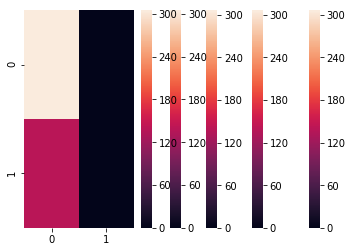

In [34]:
print('Adding in polarity and subjectivity scores:')
simpleGenderClf(dfA)

In [36]:
def xgbFit(mod,data,predictors,doEstimatorCV=True, numFolds=5, earlyStoppingRounds=50):
    trainData, validData = train_test_split(data, test_size=0.3, random_state=42)
    
    if doEstimatorCV:
        param = mod.get_xgb_params()
        dtrain = xgb.DMatrix(trainData[predictors].values, label=trainData['gender'].values)
        cvresult = xgb.cv(param, dtrain, num_boost_round=mod.get_params()['n_estimators'], nfold=numFolds,
            metrics='auc', early_stopping_rounds=earlyStoppingRounds,stratified=True)
        print('CV for number of estimators: ',cvresult.shape[0])
        mod.set_params(n_estimators=cvresult.shape[0])
    
    # Fit the algorithm on the training data
    mod.fit(trainData[predictors], trainData['gender'],eval_metric='auc')
        
    # Predict training set:
    dtrain_predictions = mod.predict(trainData[predictors])
    dtrain_predprob = mod.predict_proba(trainData[predictors])[:,1]
    
    # Predict on validation set
    dvalid_predictions = mod.predict(validData[predictors])
    dvalid_predprob = mod.predict_proba(validData[predictors])[:,1]
    
    # Print report for the model:
    print("Model Report:")
    print("Accuracy (Train) : %.4g" % metrics.accuracy_score(trainData['gender'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(trainData['gender'], dtrain_predprob))
    print("Accuracy (Test) : %.4g" % metrics.accuracy_score(validData['gender'].values, dvalid_predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(validData['gender'].values, dvalid_predprob))   
    
    # Get feature importances
    fig, ax = plt.subplots(figsize=(10, 8))
    xgb.plot_importance(mod,ax)
    #featureImportance = pd.Series(xgb.booster().get_fscore()).sort_values(ascending=False)
    #featureImportance.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [ ]:
dfC = 

['comments', 'duration', 'film_date', 'languages', 'num_speaker', 'published_date', 'views', 'Longwinded', 'Courageous', 'Obnoxious', 'Fascinating', 'OK', 'Inspiring', 'Beautiful', 'Confusing', 'Funny', 'Persuasive', 'Informative', 'Ingenious', 'Unconvincing', 'Jaw-dropping']
CV for number of estimators:  36
Model Report:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy (Train) : 0.8838
AUC Score (Train): 0.951487
Accuracy (Test) : 0.6976
AUC Score (Test): 0.719107


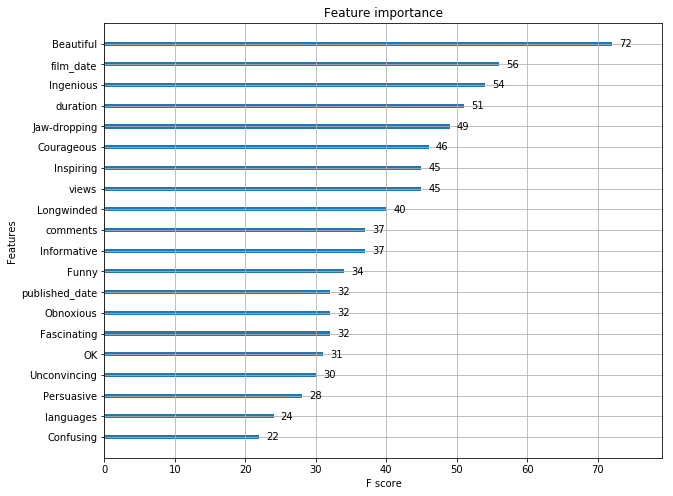

In [37]:
#running the classifier with only original attributes
orig_predictors = [feature for feature in dfB.select_dtypes(include=[np.number]).columns if feature not in ['gender', 'polarity','subjectivity']]
print(orig_predictors)
# Let's start somewhere, fix some parameters at standard values and go from there
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=0.47, # Ratio of neg to pos classes
 seed=27)

xgbFit(xgb1, dfB, orig_predictors)

['comments', 'duration', 'film_date', 'languages', 'num_speaker', 'published_date', 'views', 'Longwinded', 'Courageous', 'Obnoxious', 'Fascinating', 'OK', 'Inspiring', 'Beautiful', 'Confusing', 'Funny', 'Persuasive', 'Informative', 'Ingenious', 'Unconvincing', 'Jaw-dropping']
CV for number of estimators:  36
Model Report:
Accuracy (Train) : 0.8838
AUC Score (Train): 0.951487
Accuracy (Test) : 0.6976
AUC Score (Test): 0.719107


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


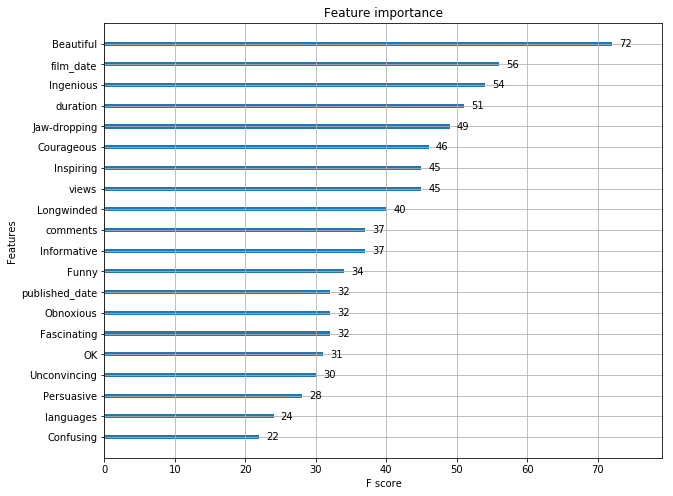

In [39]:
#including the new attributes
predictors_with_sentiments = [feature for feature in dfB.select_dtypes(include=[np.number]).columns if feature not in ['gender']]
print(predictors_with_sentiments)

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=0.47, # Ratio of neg to pos classes
 seed=27)

xgbFit(xgb1, dfB, predictors_with_sentiments)

In [40]:
dfA = dfA.replace(to_replace=0, value= 'male')


In [41]:
dfA = dfA.replace(to_replace=1, value= 'female')


In [ ]:
menTED = dfA[dfA['gender'] == 'male']
womenTED = dfA[dfA['gender'] == 'female']
#print('Description of male speaker TED data:')
#menTED.describe()
#print('Description of female speaker TED data:')
#womenTED.describe()

In [ ]:
maleCommonWords = mostFrequentWords(menTED,25,'Male Speaker',normalize=True)
femaleCommonWords = mostFrequentWords(womenTED,25,'Female Speaker',normalize=True)

In [ ]:
def getNormalizedGenderWordCounts():
    maleWords = getWords(menTED,removeStopWords=True)
    femaleWords = getWords(womenTED,removeStopWords=True)

    # Get counts for each word
    maleWordCounts = Counter(maleWords)
    femaleWordCounts = Counter(femaleWords)

    # Normalize counts by number of total words spoken by men 
    normalizedMaleWordCounts = {}
    for word,count in dict(maleWordCounts).items():
        normalizedMaleWordCounts[word] = count/float(len(maleWords))

    # Normalize counts by number of total words spoken by women 
    normalizedFemaleWordCounts = {}
    for word,count in dict(femaleWordCounts).items():
        normalizedFemaleWordCounts[word] = count/float(len(femaleWords))
        
    return normalizedMaleWordCounts, normalizedFemaleWordCounts

In [ ]:
def menVsWomenWordCounts(wordsToCount):    
    normalizedMaleWordCounts, normalizedFemaleWordCounts = getNormalizedGenderWordCounts()
    maleCount = 0
    for word,count in normalizedMaleWordCounts.items():
        if word in wordsToCount:
            maleCount += count
        
    femaleCount = 0
    for word,count in normalizedFemaleWordCounts.items():
        if word in wordsToCount:
            femaleCount += count
            
    return maleCount, femaleCount

In [42]:
uncertainty = ['um','uh','-']
maleUncertaintyCount, femaleUncertaintyCount = menVsWomenWordCounts(uncertainty)
print('Percentage of uncertainty words for men:  ',maleUncertaintyCount)
print('Percentage of uncertainty words for women:',femaleUncertaintyCount)

NameError: name 'menVsWomenWordCounts' is not defined

In [ ]:
def compareGenders(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    # violin plots in seaborn require 2 catagorical variables ('x' and 'hue'). We use 'gender' for hue.
    placeholder = np.zeros(len(dfA[feature].values))
    _ = sns.violinplot(x=placeholder, y=dfA[feature], hue=dfA.gender,split=True,ax=axes[0], palette='pastel')
    _ = axes[0].set_title('Comparing Distribution of '+feature+ ' by Gender')
    _ = sns.boxplot(x=placeholder,y=dfA[feature],hue=dfA.gender, ax = axes[1])
    _ = axes[1].set_title('Comparing Distribution of '+feature+ ' by Gender')
    plt.show()

In [ ]:
compareGenders('views')
compareGenders('comments')
compareGenders('film_date')
compareGenders('published_date')
compareGenders('duration')

In [ ]:
def sortWordsByGenderGap():
    normalizedMaleWordCounts, normalizedFemaleWordCounts = getNormalizedGenderWordCounts()
    doneWords = set() # To keep track of the words we've done
    genderGap = dict() # To record differnce by gender of word frequency
    
    # Loop through all male words and get gender difference
    for word, maleCount in normalizedMaleWordCounts.items():
        doneWords.add(word)
        if word in normalizedFemaleWordCounts.keys():
            femaleCount = normalizedFemaleWordCounts[word]
        else:
            femaleCount = 0
        diff = maleCount-femaleCount
        genderGap[word] = diff
        
    for word, femaleCount in normalizedFemaleWordCounts.items():
        # We already went through every word in male dictionary, if we reach it here, word count for men is 0,
        # therefore the difference between men and women frequencies for this word is just the women frequency.
        if word not in doneWords:
            genderGap[word] = -femaleCount 
    sortedMenFirst = sorted(genderGap.items(), key=operator.itemgetter(1),reverse=True)
    sortedWomenFirst = sorted(genderGap.items(), key=operator.itemgetter(1),reverse=False)
    
    
    
    # Plot a histogram of words that men say more frequently than women 
    _ = plt.figure(figsize=(10,6))
    _ = sns.barplot(list(dict(sortedMenFirst[0:15]).keys()), list(dict(sortedMenFirst[0:15]).values()))
    title = ('Words Said More Frequently by Men Than Women')
    _ = plt.ylabel('Relative Difference of Normalized Word Frequency')
    _ = plt.xlabel('Word')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    
    # Plot a histogram of words that women say more frequently than men 
    _ = plt.figure(figsize=(10,6))
    _ = sns.barplot(list(dict(sortedWomenFirst[0:15]).keys()), np.fabs(list(dict(sortedWomenFirst[0:15]).values())))
    title = ('Words Said More Frequently by Women Than Men')
    _ = plt.title(title)
    _ = plt.ylabel('Relative Difference of Normalized Word Frequency')
    _ = plt.xlabel('Word')
    _ = plt.xticks(rotation=300)
    plt.show()
    return sortedMenFirst

_ = sortWordsByGenderGap()

In [ ]:
# This method generates k number of clusters specified in the function call. default value is 2.
def genClusters(dataFrame, k=2):
    vector_matrix = getTFIDFvectors(dataFrame)
    means = KMeans(k, random_state =0)
    result = means.fit_predict(vector_matrix)
    result_1 = means.fit_transform(vector_matrix)
    plt.scatter(result_1[:,0],result_1[:,1],c =result, cmap = 'autumn')
    plt.title("Basic Clustering without any transformation on the data")

In [ ]:
genClusters(dfA)

In [ ]:
def genClusters_svd(dataFrame, k =2, n_comp = 5):
    vector_matrix = getTFIDFvectors(dataFrame)
    means = KMeans(k, random_state = 0)
    # doing TruncatedSVD on the matrix with specified number of components. PCA isn't supported on sparse matrices
    tSVD = TruncatedSVD(n_components = n_comp)
    transformed_vector_matrix = tSVD.fit_transform(vector_matrix)
    
    # Running Kmeans clustering algorithm on transformed data
    result = means.fit_predict(transformed_vector_matrix)
    result_1 = means.fit_transform(transformed_vector_matrix)
    plt.scatter(result_1[:,0],result_1[:,1],c =result, cmap = 'autumn')
    plt.title("Clustering the data after dimensionality reduction")

In [ ]:
genClusters_svd(dfA)

In [ ]:
##from sklearn import tree
##clf = tree.DecisionTreeClassifier()
#clf = clf.fit(dfA, dfA.gender)

In [ ]:
#treeData = tree.export_graphviz(clf, out_file=None, 
                         class_names=dfA.gender, filled=True, rounded=True, special_characters=True)  
#graph = graphviz.Source(treeData)  
#graph 